In [70]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


The code below to import grad fuction, sklearn, numpy and data

Text(0, 0.5, 'petal width (cm)')

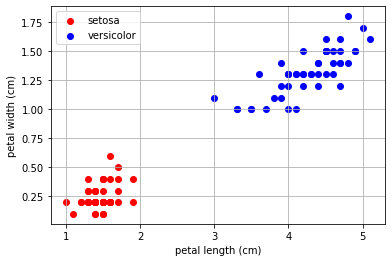

In [71]:
# This is the cross-entropy function

from autograd import grad
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
import autograd.numpy as np

iris = datasets.load_iris()
y = iris.target #y = 0 1 2, y.shape = (150,1)

#print(y)
#print(y.shape)

x1 = iris.data[y<2,2]    # length, the third coloum
x2 = iris.data[y<2,3]    # width, the fourth coloum
y = y[y<2]               #we only consider the factoer when y  = 0, y =1 
x=np.array([x1,x2])
x=x.T

#print(x.shape)
#print(y)

colors=('r','b')
for target in range(2):
   # print(target)
  
    plt.scatter(x1[y ==target],x2[y==target],c=colors[target])
    
plt.grid(1)
plt.legend([iris.target_names[0], iris.target_names[1]])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])


In [72]:
def model(x_p,w):
# compute linear comb and return
    a = w[0] + np.dot(x_p,w[1:])
 #   print("*******"+str(a))
    return a

def sigmoid(t):
    return 1/(1+np.exp(-t))


def gradient_descent(g, step, max_its ,w, p):
    gradient = grad(g)
    weight_history = [w] # weight history
    cost_history = [g(w)] # cost history container
    for k in range(max_its):
        grad_eval = gradient(w)
        grad_eval_norm = grad_eval/np.linalg.norm(grad_eval)
        if step == 'd': # diminishing step
            alpha = 1/(k+1)
        else: # constant step
            alpha = step
        w = w -alpha*grad_eval_norm

        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history , cost_history



In [73]:
def Cross_entropy(w,x,y):
    a = sigmoid(model(x,w ))
    # compute cost of label 0 points
    ind = np.argwhere(y==0)[:,0]
    cost = -np.sum(np.log(1-a[ind,:]))
    # add cost of label 1 points
    ind = np.argwhere(y==1)[:,0]
    cost -= np.sum(np.log(a[ind,:]))
    # compute cross entropy
    return cost/y.size


def Soft_Margin_svm(w,x,y):
    y_temp = y*2-1
    a = -(y_temp.reshape(-1,1)*model(x,w )) +1
    b = np.exp(a)+1
    regularization = 0.3*(np.linalg.norm(w[1:]))**2
    cost = np.sum(np.log(b)) + regularization
    return cost/y.size


def Softmax(w,x,y):
    y_temp = y*2-1
    a = -(y_temp.reshape(-1,1)*model(x,w )) 
    b = np.exp(a)+1
    cost = np.sum(np.log(b))
    return cost/y.size


def Cross_Entropy(t):
    Cross_Entropy =Cross_entropy(t,x,y)
    return Cross_Entropy

def Soft_SVM(t):
    Soft_SVM =Soft_Margin_svm(t,x,y)
    return Soft_SVM

def Soft_MAX(t):
    Soft_MAX =Softmax(t,x,y)
    return Soft_MAX

This is the model of Cross-Entropy:<br>
This is the model of Cross-Entropy:<br>
This is the model of Cross-Entropy:<br>

(0.0, 2.0)

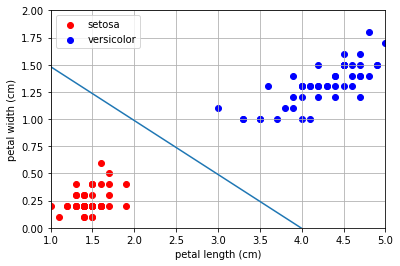

In [66]:
iter =100
w = np.array ([[1.], [1.], [1.]])
a, b = gradient_descent(Cross_Entropy, 0.1, iter,w,0)
#print(a[iter][1])


colors=('r','b')
for target in range(2):
    plt.scatter(x1[y ==target],x2[y==target],c=colors[target])

plt.grid(1)
plt.legend([iris.target_names[0], iris.target_names[1]])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

x1p=np.linspace(1,5,20)
x2p=-(a[iter][0]+ a[iter][1]*x1p)/a[iter][2]

plt.plot(x1p,x2p)
plt.xlim(1,5)
plt.ylim(0,2)


#print(a[100])

This is the model of SoftMax:<br>
This is the model of SoftMax:<br>
This is the model of SoftMax:<br>

(0.0, 2.0)

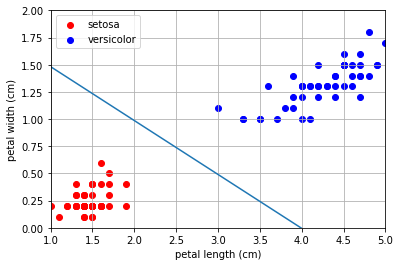

In [67]:
iter =100
w = np.array ([[1.], [1.], [1.]])
a, b = gradient_descent(Soft_MAX, 0.1, iter,w,0)
#print(a[iter][1])


colors=('r','b')
for target in range(2):
    plt.scatter(x1[y ==target],x2[y==target],c=colors[target])

plt.grid(1)
plt.legend([iris.target_names[0], iris.target_names[1]])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

x1p=np.linspace(1,5,20)
x2p=-(a[iter][0]+ a[iter][1]*x1p)/a[iter][2]

plt.plot(x1p,x2p)
plt.xlim(1,5)
plt.ylim(0,2)


#print(a[100])

This is the model of Soft_SVM:<br>
This is the model of Soft_SVM:<br>
This is the model of Soft_SVM:<br>


(0.0, 2.0)

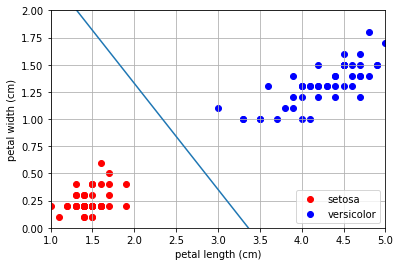

In [74]:
iter =100
w = np.array ([[1.], [1.], [1.]])
a, b = gradient_descent(Soft_SVM, 0.1, iter,w,0)
#print(a[iter][1])


colors=('r','b')
for target in range(2):
    plt.scatter(x1[y ==target],x2[y==target],c=colors[target])

plt.grid(1)
plt.legend([iris.target_names[0], iris.target_names[1]])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

x1p=np.linspace(1,5,20)
x2p=-(a[iter][0]+ a[iter][1]*x1p)/a[iter][2]

plt.plot(x1p,x2p)
plt.xlim(1,5)
plt.ylim(0,2)


#print(a[100])